In [1]:
import pandas as pd



data = pd.read_csv("시군구별매매전세_noise_보간.csv")
display(data)

,Unnamed: 0,시군구,계약년월,면적당보증금,시,면적당매매금
0,0,강원특별자치도 강릉시 견소동,201908,207.164427,강원특별자치도 강릉시,228.137412
1,1,강원특별자치도 강릉시 견소동,201909,199.646793,강원특별자치도 강릉시,223.839083
2,2,강원특별자치도 강릉시 견소동,201910,222.682534,강원특별자치도 강릉시,248.238090
3,3,강원특별자치도 강릉시 견소동,201911,260.329239,강원특별자치도 강릉시,248.297844
4,4,강원특별자치도 강릉시 견소동,201912,220.911840,강원특별자치도 강릉시,236.294295
...,...,...,...,...,...,...
96427,96427,충청북도 충주시 호암동,202303,259.748017,충청북도 충주시,260.279084
96428,96428,충청북도 충주시 호암동,202304,190.967701,충청북도 충주시,271.155606
96429,96429,충청북도 충주시 호암동,202305,237.558371,충청북도 충주시,277.110797
96430,96430,충청북도 충주시 호암동,202306,315.277732,충청북도 충주시,261.226532


In [2]:
data = data[['시군구','계약년월','면적당보증금','면적당매매금']]
display(data)

,시군구,계약년월,면적당보증금,면적당매매금
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295
...,...,...,...,...
96427,충청북도 충주시 호암동,202303,259.748017,260.279084
96428,충청북도 충주시 호암동,202304,190.967701,271.155606
96429,충청북도 충주시 호암동,202305,237.558371,277.110797
96430,충청북도 충주시 호암동,202306,315.277732,261.226532


In [3]:
print(len(set(data['시군구'])))

2009


In [11]:
data['전세율'] = 100* data['면적당보증금'] /data['면적당매매금']

In [12]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129
...,...,...,...,...,...
96427,충청북도 충주시 호암동,202303,259.748017,260.279084,99.795963
96428,충청북도 충주시 호암동,202304,190.967701,271.155606,70.427347
96429,충청북도 충주시 호암동,202305,237.558371,277.110797,85.726855
96430,충청북도 충주시 호암동,202306,315.277732,261.226532,120.691313


In [13]:
set_date = sorted(list(set(data['계약년월'])))
print(len(set_date))

48


In [14]:
max(data['전세율'])

777.0308184869588

In [15]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129
...,...,...,...,...,...
96427,충청북도 충주시 호암동,202303,259.748017,260.279084,99.795963
96428,충청북도 충주시 호암동,202304,190.967701,271.155606,70.427347
96429,충청북도 충주시 호암동,202305,237.558371,277.110797,85.726855
96430,충청북도 충주시 호암동,202306,315.277732,261.226532,120.691313


In [16]:
danger_zone = 85

def danger(data):
    if data >= danger_zone:
        return 1
    else:
        return 0

data['전세율_분류'] = data['전세율'].apply(danger)

In [17]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1
...,...,...,...,...,...,...
96427,충청북도 충주시 호암동,202303,259.748017,260.279084,99.795963,1
96428,충청북도 충주시 호암동,202304,190.967701,271.155606,70.427347,0
96429,충청북도 충주시 호암동,202305,237.558371,277.110797,85.726855,1
96430,충청북도 충주시 호암동,202306,315.277732,261.226532,120.691313,1


In [153]:
data[data['전세율']>200]['시군구']

712          강원특별자치도 동해시 발한동
714          강원특별자치도 동해시 발한동
1081         강원특별자치도 속초시 동명동
1496     강원특별자치도 영월군 영월읍 하송리
2545     강원특별자치도 정선군 사북읍 사북리
                ...         
96040           충청북도 충주시 봉방동
96410           충청북도 충주시 호암동
96411           충청북도 충주시 호암동
96417           충청북도 충주시 호암동
96419           충청북도 충주시 호암동
Name: 시군구, Length: 301, dtype: object

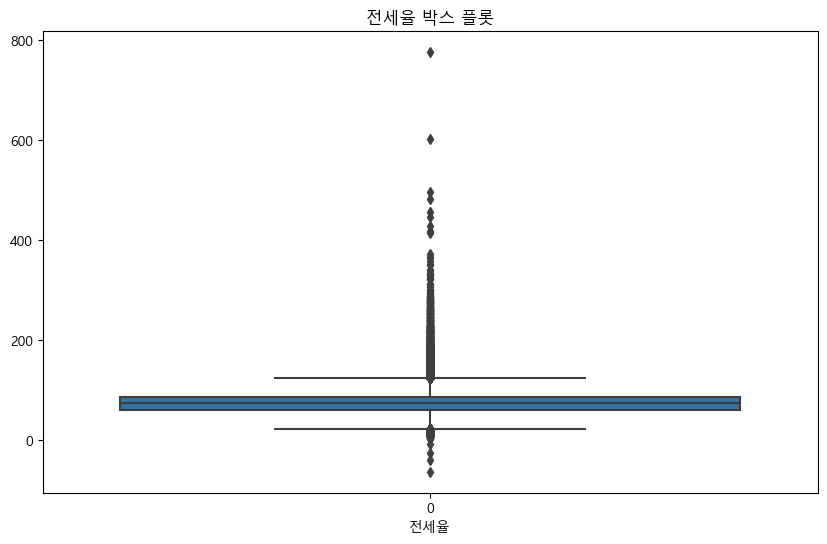

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 전세율
plt.figure(figsize=(10, 6))
sns.boxplot(data['전세율'])
plt.title('전세율 박스 플롯')
plt.xlabel('전세율')
plt.show()

In [157]:
data = data['시군구']set(data[data['전세율']>200]['시군구'])

115

In [159]:
# Identify the 시군구 where 전세율 > 200
remove_sigungu = set(data[data['전세율'] > 200]['시군구'])

# Filter the data to exclude rows with those 시군구
data = data[~data['시군구'].isin(remove_sigungu)]


In [19]:
data.to_csv("train_data.csv")

In [21]:
def get_location_from_sigungu(api_key, sigungu):
    import googlemaps

    gmaps = googlemaps.Client(key=api_key)
    geocode_result = gmaps.geocode(sigungu, region='kr')

    # Return latitude and longitude
    return geocode_result[0]['geometry']['location']

In [22]:
L = list(set(data['시군구']))

In [23]:
L

['충청남도 서산시 죽성동',
 '서울특별시 동작구 대방동',
 '경기도 용인처인구 삼가동',
 '제주특별자치도 제주시 삼도이동',
 '경상북도 안동시 태화동',
 '부산광역시 부산진구 전포동',
 '경기도 안성시 죽산면 장원리',
 '강원특별자치도 원주시 문막읍 동화리',
 '경상남도 김해시 어방동',
 '충청남도 당진시 우강면 송산리',
 '충청남도 아산시 좌부동',
 '전라남도 영암군 삼호읍 용당리',
 '충청남도 예산군 삽교읍 목리',
 '경기도 남양주시 와부읍 도곡리',
 '경기도 화성시 남양읍 남양리',
 '광주광역시 북구 신안동',
 '전라남도 화순군 화순읍 광덕리',
 '대전광역시 중구 문화동',
 '경기도 광주시 경안동',
 '경기도 오산시 오산동',
 '경기도 수원권선구 곡반정동',
 '제주특별자치도 제주시 구좌읍 세화리',
 '강원특별자치도 원주시 개운동',
 '충청남도 아산시 배미동',
 '충청남도 아산시 실옥동',
 '서울특별시 마포구 신수동',
 '충청북도 충주시 칠금동',
 '경상남도 사천시 사천읍 사주리',
 '전라북도 완주군 삼례읍 삼례리',
 '서울특별시 영등포구 당산동2가',
 '경기도 평택시 청북읍 옥길리',
 '인천광역시 연수구 옥련동',
 '대구광역시 동구 신천동',
 '전라남도 화순군 화순읍 만연리',
 '경기도 의정부시 녹양동',
 '대전광역시 대덕구 석봉동',
 '충청남도 예산군 예산읍 산성리',
 '경상북도 구미시 선산읍 노상리',
 '경기도 광주시 역동',
 '경기도 파주시 목동동',
 '경상남도 사천시 사천읍 선인리',
 '울산광역시 중구 남외동',
 '충청남도 아산시 음봉면 동암리',
 '강원특별자치도 춘천시 조양동',
 '서울특별시 종로구 무악동',
 '경상북도 안동시 옥동',
 '경기도 구리시 교문동',
 '인천광역시 남동구 간석동',
 '부산광역시 영도구 봉래동3가',
 '경상북도 영천시 완산동',
 '경상북도 예천군 호명면 산합리',
 '경상남도 김해시 부곡동',
 '경기도 평택시 평택동',
 '부산광

In [43]:
diction = {}
api_key = "APIKEY값 입력"
s = 0
for i in L:
    try:
        diction[i] = get_location_from_sigungu(api_key, i)
        print(f"{s}번째 추출중: {diction[i]}")
        s +=1
    except IndexError:
        print('오류가 발생하여 넘어갑니다')

0번째 추출중: {'lat': 36.7485771, 'lng': 126.4433575}
1번째 추출중: {'lat': 37.5060736, 'lng': 126.9281015}
2번째 추출중: {'lat': 37.24019610000001, 'lng': 127.165595}
3번째 추출중: {'lat': 33.5126626, 'lng': 126.5212175}
4번째 추출중: {'lat': 36.5605334, 'lng': 128.7088115}
5번째 추출중: {'lat': 35.1575101, 'lng': 129.0710937}
6번째 추출중: {'lat': 37.0667159, 'lng': 127.4269438}
7번째 추출중: {'lat': 37.3264572, 'lng': 127.8461587}
8번째 추출중: {'lat': 35.2405154, 'lng': 128.9010724}
9번째 추출중: {'lat': 36.8210962, 'lng': 126.7763319}
10번째 추출중: {'lat': 36.7559411, 'lng': 127.0281898}
11번째 추출중: {'lat': 34.7554991, 'lng': 126.3889479}
12번째 추출중: {'lat': 36.6658754, 'lng': 126.6735355}
13번째 추출중: {'lat': 37.5774537, 'lng': 127.2415895}
14번째 추출중: {'lat': 37.2043709, 'lng': 126.8176142}
15번째 추출중: {'lat': 35.1687174, 'lng': 126.9001748}
16번째 추출중: {'lat': 35.056273, 'lng': 126.9898216}
17번째 추출중: {'lat': 36.3093896, 'lng': 127.4091649}
18번째 추출중: {'lat': 37.4104911, 'lng': 127.2528351}
19번째 추출중: {'lat': 37.1526052, 'lng': 127.0709609}
20번째 

In [45]:
diction

{'충청남도 서산시 죽성동': {'lat': 36.7485771, 'lng': 126.4433575},
 '서울특별시 동작구 대방동': {'lat': 37.5060736, 'lng': 126.9281015},
 '경기도 용인처인구 삼가동': {'lat': 37.24019610000001, 'lng': 127.165595},
 '제주특별자치도 제주시 삼도이동': {'lat': 33.5126626, 'lng': 126.5212175},
 '경상북도 안동시 태화동': {'lat': 36.5605334, 'lng': 128.7088115},
 '부산광역시 부산진구 전포동': {'lat': 35.1575101, 'lng': 129.0710937},
 '경기도 안성시 죽산면 장원리': {'lat': 37.0667159, 'lng': 127.4269438},
 '강원특별자치도 원주시 문막읍 동화리': {'lat': 37.3264572, 'lng': 127.8461587},
 '경상남도 김해시 어방동': {'lat': 35.2405154, 'lng': 128.9010724},
 '충청남도 당진시 우강면 송산리': {'lat': 36.8210962, 'lng': 126.7763319},
 '충청남도 아산시 좌부동': {'lat': 36.7559411, 'lng': 127.0281898},
 '전라남도 영암군 삼호읍 용당리': {'lat': 34.7554991, 'lng': 126.3889479},
 '충청남도 예산군 삽교읍 목리': {'lat': 36.6658754, 'lng': 126.6735355},
 '경기도 남양주시 와부읍 도곡리': {'lat': 37.5774537, 'lng': 127.2415895},
 '경기도 화성시 남양읍 남양리': {'lat': 37.2043709, 'lng': 126.8176142},
 '광주광역시 북구 신안동': {'lat': 35.1687174, 'lng': 126.9001748},
 '전라남도 화순군 화순읍 광덕리': {'lat': 3

In [46]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,0.0,0.0,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,0.0,0.0,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,0.0,0.0,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,0.0,0.0,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,0.0,0.0,0.0294
...,...,...,...,...,...,...,...,...,...
96427,충청북도 충주시 호암동,202303,259.748017,260.279084,99.795963,1,0.0,0.0,0.0489
96428,충청북도 충주시 호암동,202304,190.967701,271.155606,70.427347,0,0.0,0.0,0.0473
96429,충청북도 충주시 호암동,202305,237.558371,277.110797,85.726855,1,0.0,0.0,0.0429
96430,충청북도 충주시 호암동,202306,315.277732,261.226532,120.691313,1,0.0,0.0,0.0425


In [160]:
data['위도'] = data['시군구'].map(lambda x: diction.get(x, {}).get('lat', None))
data['경도'] = data['시군구'].map(lambda x: diction.get(x, {}).get('lng', None))


C:\Users\Jinwooserver\AppData\Local\Temp\ipykernel_21384\2314145117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['위도'] = data['시군구'].map(lambda x: diction.get(x, {}).get('lat', None))
C:\Users\Jinwooserver\AppData\Local\Temp\ipykernel_21384\2314145117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['경도'] = data['시군구'].map(lambda x: diction.get(x, {}).get('lng', None))


In [161]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...
96379,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
96380,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
96381,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
96382,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [162]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...
96379,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
96380,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
96381,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
96382,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [163]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...
96379,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
96380,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
96381,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
96382,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [165]:
data.to_csv("학습데이터.csv")

In [8]:
interest_rate = pd.read_excel("6a34612008b331ae (1).xlsx")
display(interest_rate )

,공시년월일,주택담보대출금리
0,2023-07-01,0.0444
1,2023-06-01,0.0425
2,2023-05-01,0.0429
3,2023-04-01,0.0473
4,2023-03-01,0.0489
5,2023-02-01,0.0523
6,2023-01-01,0.0536
7,2022-12-01,0.0511
8,2022-11-01,0.0482
9,2022-10-01,0.0459


In [9]:
interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   공시년월일     48 non-null     datetime64[ns]
 1   주택담보대출금리  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [10]:
interest_rate['계약년월'] = interest_rate['공시년월일'].dt.strftime('%Y%m')

In [11]:
interest_rate

,공시년월일,주택담보대출금리,계약년월
0,2023-07-01,0.0444,202307
1,2023-06-01,0.0425,202306
2,2023-05-01,0.0429,202305
3,2023-04-01,0.0473,202304
4,2023-03-01,0.0489,202303
5,2023-02-01,0.0523,202302
6,2023-01-01,0.0536,202301
7,2022-12-01,0.0511,202212
8,2022-11-01,0.0482,202211
9,2022-10-01,0.0459,202210


In [12]:
interest_rate_dict = {}
for i in range(len(interest_rate['계약년월'])):
    interest_rate_dict[int(interest_rate['계약년월'].loc[i])] = interest_rate['주택담보대출금리'].loc[i]


In [13]:
interest_rate_dict

{202307: 0.0444,
 202306: 0.0425,
 202305: 0.0429,
 202304: 0.0473,
 202303: 0.0489,
 202302: 0.0523,
 202301: 0.0536,
 202212: 0.0511,
 202211: 0.0482,
 202210: 0.0459,
 202209: 0.0429,
 202208: 0.0413,
 202207: 0.0404,
 202206: 0.0386,
 202205: 0.0384,
 202204: 0.0391,
 202203: 0.0396,
 202202: 0.0398,
 202201: 0.0382,
 202112: 0.0361,
 202111: 0.0334,
 202110: 0.0297,
 202109: 0.0276,
 202108: 0.0265,
 202107: 0.0256,
 202106: 0.0261,
 202105: 0.027,
 202104: 0.028,
 202103: 0.0285,
 202102: 0.029,
 202101: 0.0289,
 202012: 0.0278,
 202011: 0.0264,
 202010: 0.0259,
 202009: 0.0251,
 202008: 0.0255,
 202007: 0.0257,
 202006: 0.0256,
 202005: 0.0266,
 202004: 0.0264,
 202003: 0.0266,
 202002: 0.0277,
 202001: 0.0279,
 201912: 0.0294,
 201911: 0.0274,
 201910: 0.0269,
 201909: 0.0264,
 201908: 0.0285}

In [53]:
import pandas as pd
data = pd.read_csv("학습데이터.csv")

In [54]:
data

,Unnamed: 0,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...,...
90907,96379,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
90908,96380,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
90909,96381,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
90910,96382,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [55]:
data = data.drop(columns = ['Unnamed: 0'],axis = 1)

In [56]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...
90907,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
90908,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
90909,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
90910,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [18]:
data['이자율'] = data['계약년월'].map(interest_rate_dict)


In [19]:
data

,시군구,계약년월,면적당보증금,면적당매매금,전세율,전세율_분류,위도,경도,이자율
0,강원특별자치도 강릉시 견소동,201908,207.164427,228.137412,90.806863,1,37.772679,128.943061,0.0285
1,강원특별자치도 강릉시 견소동,201909,199.646793,223.839083,89.192107,1,37.772679,128.943061,0.0264
2,강원특별자치도 강릉시 견소동,201910,222.682534,248.238090,89.705224,1,37.772679,128.943061,0.0269
3,강원특별자치도 강릉시 견소동,201911,260.329239,248.297844,104.845550,1,37.772679,128.943061,0.0274
4,강원특별자치도 강릉시 견소동,201912,220.911840,236.294295,93.490129,1,37.772679,128.943061,0.0294
...,...,...,...,...,...,...,...,...,...
90907,충청북도 충주시 칠금동,202303,191.752192,229.259639,83.639751,0,36.984614,127.908494,0.0489
90908,충청북도 충주시 칠금동,202304,197.151956,230.071581,85.691573,1,36.984614,127.908494,0.0473
90909,충청북도 충주시 칠금동,202305,199.891325,220.442490,90.677312,1,36.984614,127.908494,0.0429
90910,충청북도 충주시 칠금동,202306,188.345279,244.456533,77.046531,0,36.984614,127.908494,0.0425


In [132]:
print(data['면적당보증금'].iloc[0:5])
print(data['면적당매매금'].iloc[0:5])
print(data['전세율'].iloc[0:5])
print(data['위도'].iloc[0:5])
print(data['경도'].iloc[0:5])
print(data['이자율'].iloc[0:5])

0    207.164427
1    199.646793
2    222.682534
3    260.329239
4    220.911840
Name: 면적당보증금, dtype: float64
0    228.137412
1    223.839083
2    248.238090
3    248.297844
4    236.294295
Name: 면적당매매금, dtype: float64
0     90.806863
1     89.192107
2     89.705224
3    104.845550
4     93.490129
Name: 전세율, dtype: float64
0    37.772679
1    37.772679
2    37.772679
3    37.772679
4    37.772679
Name: 위도, dtype: float64
0    128.943061
1    128.943061
2    128.943061
3    128.943061
4    128.943061
Name: 경도, dtype: float64
0    0.0285
1    0.0264
2    0.0269
3    0.0274
4    0.0294
Name: 이자율, dtype: float64


In [23]:
# Reload the data again
import seaborn as sns
import matplotlib as plt
from matplotlib import font_manager
from matplotlib import rc
f_path = "C:/windows/Fonts/malgun.ttf"
# Calculate the correlation matrix
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('상관 계수 히트맵')
plt.show()

C:\Users\Jinwooserver\AppData\Local\Temp\ipykernel_10292\608263742.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


TypeError: 'module' object is not callable

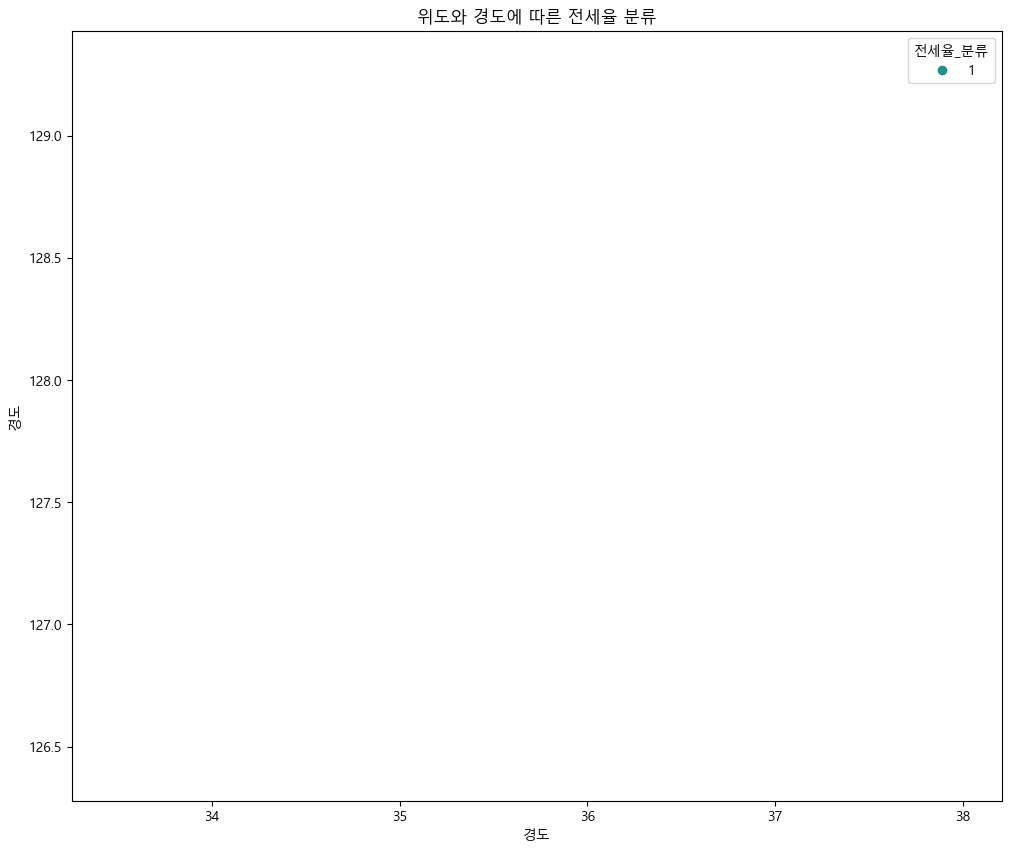

In [ ]:
# Scatter plot using 위도 and 경도 with 전세율_분류 as hue
filtered_data = data[data['전세율_분류'] == 1]
plt.figure(figsize=(12, 10))
sns.scatterplot(x='경도', y='위도', hue='전세율_분류', data=filtered_data, palette='viridis', s=60)
plt.title('위도와 경도에 따른 전세율 분류')
plt.xlabel('경도')
plt.ylabel('경도')
plt.xlim(data['위도'].min(), data['위도'].max())
plt.ylim(data['경도'].min(), data['경도'].max())
plt.show()

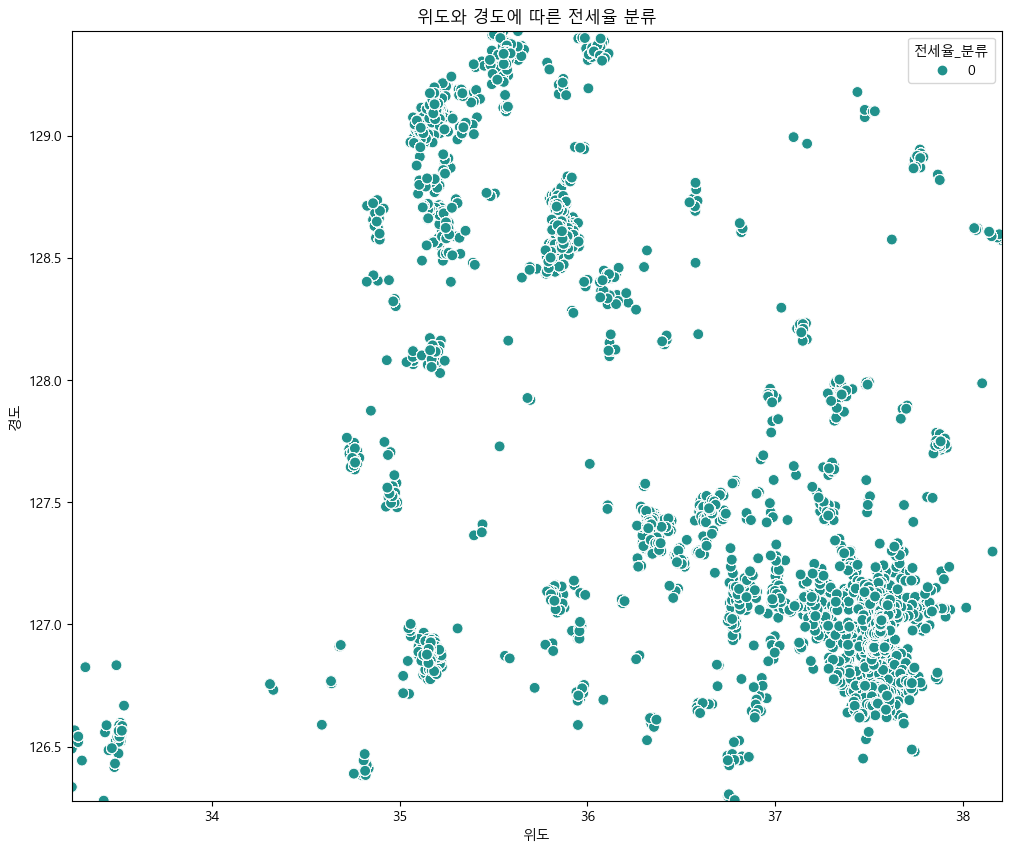

In [ ]:
# Scatter plot using 위도 and 경도 with 전세율_분류 as hue
filtered_data = data[data['전세율_분류'] == 0]
plt.figure(figsize=(12, 10))
sns.scatterplot(x='위도', y='경도', hue='전세율_분류', data=filtered_data, palette='viridis', s=60)
plt.title('위도와 경도에 따른 전세율 분류')
plt.xlabel('위도')
plt.ylabel('경도')
plt.xlim(data['위도'].min(), data['위도'].max())
plt.ylim(data['경도'].min(), data['경도'].max())
plt.show()

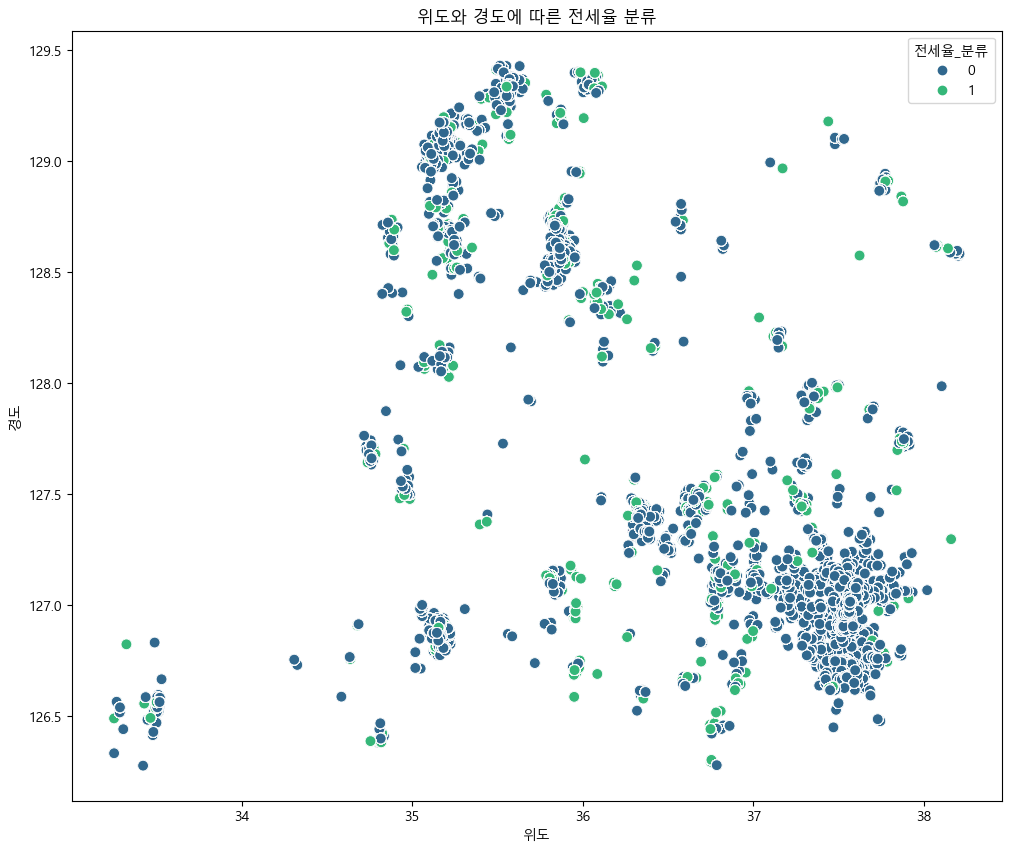

In [ ]:
# Scatter plot using 위도 and 경도 with 전세율_분류 as hue
plt.figure(figsize=(12, 10))
sns.scatterplot(x='위도', y='경도', hue='전세율_분류', data=data, palette='viridis', s=60)
plt.title('위도와 경도에 따른 전세율 분류')
plt.xlabel('위도')
plt.ylabel('경도')
plt.show()

상당히 비선형적이고 변수들간의 관계가 높지 않으므로 딥러닝 모델 중 CNN을 선택하였습니다

In [57]:
data.reset_index(drop=True,inplace=True)

In [58]:
X = []
y = []
for i in range(1894):
    for j in range(42):
        X.append(data.loc[48*i+j:48*i+j+4].drop(['시군구','계약년월','전세율_분류'],axis = 1).values.tolist())
        y.append(data.loc[48*i+j+5]['전세율_분류'])

In [59]:
X,y

([[[207.1644268106964,
    228.13741159385484,
    90.8068630056626,
    37.7726788,
    128.9430612,
    0.0285],
   [199.646793307149,
    223.83908298134256,
    89.19210651152908,
    37.7726788,
    128.9430612,
    0.0264],
   [222.68253401866983,
    248.2380903536792,
    89.70522360263129,
    37.7726788,
    128.9430612,
    0.0269],
   [260.3292388294207,
    248.2978435169832,
    104.84554966004552,
    37.7726788,
    128.9430612,
    0.0274],
   [220.9118403762856,
    236.2942951060857,
    93.49012860302273,
    37.7726788,
    128.9430612,
    0.0294]],
  [[199.646793307149,
    223.83908298134256,
    89.19210651152908,
    37.7726788,
    128.9430612,
    0.0264],
   [222.68253401866983,
    248.2380903536792,
    89.70522360263129,
    37.7726788,
    128.9430612,
    0.0269],
   [260.3292388294207,
    248.2978435169832,
    104.84554966004552,
    37.7726788,
    128.9430612,
    0.0274],
   [220.9118403762856,
    236.2942951060857,
    93.49012860302273,
    37

In [60]:
import numpy as np

In [61]:
X = np.array(X)
y = np.array(y)

In [62]:
len(X)

79548

In [63]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

X.shape, y.shape

((79548, 5, 6), (79548,))

In [64]:
X

array([[[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 3.77726788e+01,
         1.28943061e+02, 2.85000000e-02],
        [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 3.77726788e+01,
         1.28943061e+02, 2.64000000e-02],
        [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 3.77726788e+01,
         1.28943061e+02, 2.69000000e-02],
        [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 3.77726788e+01,
         1.28943061e+02, 2.74000000e-02],
        [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 3.77726788e+01,
         1.28943061e+02, 2.94000000e-02]],

       [[1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 3.77726788e+01,
         1.28943061e+02, 2.64000000e-02],
        [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 3.77726788e+01,
         1.28943061e+02, 2.69000000e-02],
        [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 3.77726788e+01,
         1.28943061e+02, 2.74000000e-02],
        [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 3.77726788e+01,
     

In [65]:
print(X[0])

[[2.07164427e+02 2.28137412e+02 9.08068630e+01 3.77726788e+01
  1.28943061e+02 2.85000000e-02]
 [1.99646793e+02 2.23839083e+02 8.91921065e+01 3.77726788e+01
  1.28943061e+02 2.64000000e-02]
 [2.22682534e+02 2.48238090e+02 8.97052236e+01 3.77726788e+01
  1.28943061e+02 2.69000000e-02]
 [2.60329239e+02 2.48297844e+02 1.04845550e+02 3.77726788e+01
  1.28943061e+02 2.74000000e-02]
 [2.20911840e+02 2.36294295e+02 9.34901286e+01 3.77726788e+01
  1.28943061e+02 2.94000000e-02]]


In [ ]:
ㅛ[0]

In [66]:
from sklearn.model_selection import train_test_split



In [89]:
X_train[0]

array([[2.86844276e+02, 2.57079902e+02, 1.11577869e+02, 3.51811657e+01,
        1.26859188e+02, 3.98000000e-02],
       [2.85474370e+02, 3.22957725e+02, 8.83937270e+01, 3.51811657e+01,
        1.26859188e+02, 3.96000000e-02],
       [2.95566960e+02, 2.46670064e+02, 1.19822793e+02, 3.51811657e+01,
        1.26859188e+02, 3.91000000e-02],
       [2.51389859e+02, 2.58161489e+02, 9.73769788e+01, 3.51811657e+01,
        1.26859188e+02, 3.84000000e-02],
       [2.85209937e+02, 2.81147763e+02, 1.01444854e+02, 3.51811657e+01,
        1.26859188e+02, 3.86000000e-02]])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [91]:
y_test 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [92]:
set(y_test)

{0, 1}

In [93]:
ans_1 = 0
ans_2 = 0
for i in y_train:
    if i == 1:
        ans_1+=1
    else:
        ans_2+=1
    
print(ans_1,ans_2)

16093 47545


In [94]:
from sklearn.utils.class_weight import compute_class_weight

# y_train을 사용하여 클래스 가중치 계산
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# 클래스 가중치를 딕셔너리로 변환
class_weight_dict = dict(enumerate(class_weights))

# 확인
print(class_weight_dict)

{0: 0.6692396676832475, 1: 1.9771950537500778}


In [95]:
set(y_train)

{0, 1}

In [96]:
from keras import backend as K

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from keras import metrics
from sklearn.utils.class_weight import compute_class_weight
# Define a simple CNN model





simple_model = Sequential()
# Third convolutional layer
simple_model.add(Conv1D(filters=256, kernel_size=3, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))

# Flatten the output
simple_model.add(Flatten())
simple_model.add(Dense(128, activation='relu'))
simple_model.add(Dense(128, activation='relu'))
simple_model.add(Dense(128, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))  # Binary classification
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_model.summary()
simple_model.fit(X_train, y_train, epochs=30, batch_size=128,class_weight =class_weight_dict)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3, 256)            4864      
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               98432     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 136,449
Trainable params: 136,449
Non-tr

498/498 [==============================] - 3s 3ms/step - loss: 0.6210 - accuracy: 0.7309
Epoch 2/30
498/498 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7531
Epoch 3/30
498/498 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.7576
Epoch 4/30
498/498 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.7598
Epoch 5/30
498/498 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.7603
Epoch 6/30
498/498 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.7609
Epoch 7/30
498/498 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.7626
Epoch 8/30
498/498 [==============================] - 2s 3ms/step - loss: 0.4633 - accuracy: 0.7620
Epoch 9/30
498/498 [==============================] - 2s 4ms/step - loss: 0.4631 - accuracy: 0.7625
Epoch 10/30
498/498 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.7633
Epoch 11/3

In [98]:
predictions = simple_model.predict(X_test)

498/498 [==============================] - 1s 905us/step


In [99]:
predictions

array([[0.6145329 ],
       [0.01212893],
       [0.05306742],
       ...,
       [0.02049071],
       [0.03466057],
       [0.82535255]], dtype=float32)

In [100]:
pred_class = np.where(predictions > 0.5, 1, 0)

In [101]:
pred_class

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [102]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [103]:
from sklearn.metrics import classification_report

In [104]:
# confusion matrix 사용을 위한 라이브러리
print(classification_report(y_test, pred_class))   


              precision    recall  f1-score   support

           0       0.92      0.77      0.84     11934
           1       0.54      0.80      0.64      3976

    accuracy                           0.78     15910
   macro avg       0.73      0.78      0.74     15910
weighted avg       0.82      0.78      0.79     15910



In [105]:
simple_model.save('simple_model_2.h5')

In [106]:
X[0]

array([[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 3.77726788e+01,
        1.28943061e+02, 2.85000000e-02],
       [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 3.77726788e+01,
        1.28943061e+02, 2.64000000e-02],
       [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 3.77726788e+01,
        1.28943061e+02, 2.69000000e-02],
       [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 3.77726788e+01,
        1.28943061e+02, 2.74000000e-02],
       [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 3.77726788e+01,
        1.28943061e+02, 2.94000000e-02]])

In [107]:
import json
import numpy as np

# Given data as a JSON-like structure
data_str = '''
{
  "data": [[[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 9.12061638e-01,
  8.45622447e-01, 2.85000000e-02],
 [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 9.12061638e-01,
  8.45622447e-01, 2.64000000e-02],
 [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 9.12061638e-01,
  8.45622447e-01, 2.69000000e-02],
 [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 9.12061638e-01,
  8.45622447e-01, 2.74000000e-02],
 [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 9.12061638e-01,
  8.45622447e-01, 2.94000000e-02]]]}
'''

# Parse the JSON string to a Python object
data_dict = json.loads(data_str)

# Convert the list to a numpy array with floats
data_array = np.array(data_dict["data"], dtype=float)

data_array

array([[[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 9.12061638e-01,
         8.45622447e-01, 2.85000000e-02],
        [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 9.12061638e-01,
         8.45622447e-01, 2.64000000e-02],
        [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 9.12061638e-01,
         8.45622447e-01, 2.69000000e-02],
        [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 9.12061638e-01,
         8.45622447e-01, 2.74000000e-02],
        [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 9.12061638e-01,
         8.45622447e-01, 2.94000000e-02]]])

In [110]:
X[0]

array([[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 3.77726788e+01,
        1.28943061e+02, 2.85000000e-02],
       [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 3.77726788e+01,
        1.28943061e+02, 2.64000000e-02],
       [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 3.77726788e+01,
        1.28943061e+02, 2.69000000e-02],
       [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 3.77726788e+01,
        1.28943061e+02, 2.74000000e-02],
       [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 3.77726788e+01,
        1.28943061e+02, 2.94000000e-02]])

In [126]:
import numpy as np

# X[0]의 형태가 (5, 6)이므로, 이를 (1, 5, 6)으로 바꿉니다.
X_sample_reshaped = np.expand_dims(X[0], axis=0)

# 이제 예측을 실행
predictions = simple_model.predict(X_sample_reshaped)


1/1 [==============================] - 0s 20ms/step


In [127]:
predictions

array([[0.9001505]], dtype=float32)

In [131]:
X_sample_reshaped

array([[[2.07164427e+02, 2.28137412e+02, 9.08068630e+01, 3.77726788e+01,
         1.28943061e+02, 2.85000000e-02],
        [1.99646793e+02, 2.23839083e+02, 8.91921065e+01, 3.77726788e+01,
         1.28943061e+02, 2.64000000e-02],
        [2.22682534e+02, 2.48238090e+02, 8.97052236e+01, 3.77726788e+01,
         1.28943061e+02, 2.69000000e-02],
        [2.60329239e+02, 2.48297844e+02, 1.04845550e+02, 3.77726788e+01,
         1.28943061e+02, 2.74000000e-02],
        [2.20911840e+02, 2.36294295e+02, 9.34901286e+01, 3.77726788e+01,
         1.28943061e+02, 2.94000000e-02]]])

In [130]:
simple_model.save('simple_model_3.h5')